<a href="https://colab.research.google.com/github/Ram-Pasupula/torch/blob/main/Iris_nn_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Torch Basic Neural Network Model

https://www.researchgate.net/figure/Deep-Neural-Network-architecture_fig1_330120030

In [70]:
#Import packages

import torch
import torch.nn as nn
import torch.nn.functional as F



In [71]:
#Create a model calss that inherits nn.module

#dataset -https://www.kaggle.com/datasets/uciml/iris
#https://archive.ics.uci.edu/dataset/53/iris
#0/p- class of iris plant: Iris Setosa, Iris Versicolour, or Iris Virginica
#sepal length	Feature
#sepal width	Feature
#petal length	Feature
#petal width	Feature
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_size1=8, hidden_size2=9, output_features=3):
        super().__init__()
        #input fully connected to first hidenlayer
        self.fc1 = nn.Linear(input_features, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_features)

    def forward(self, x):
        #relu- rectified linear unit <0 = 0
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x =self.fc3(x)
        return x

In [72]:
#Pick a manual seed for randomisation
torch.manual_seed(0)
#Create an instance of the model
model = Model()




In [73]:
#read dataset using pandas dataframe
import pandas as pd
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
# replace last column names with integer values

df['species'].replace(['setosa', 'versicolor', 'virginica'],
                        [0, 1, 2], inplace=True)
#df.head()
#df.tail()

In [75]:
#Extract features and output
y = df['species']
x= df.drop('species', axis=1)
x = x.values
y = y.values


In [76]:
#import sci-kit package
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test.shape)

(120, 4)
(30, 4)
[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 0 0 2 1 2 0]
(30,)


In [77]:
#Covert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
#print(x_train)
#Covert y features to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [78]:
# Set the criterion of the model to measure the  error
criterion = nn.CrossEntropyLoss()
#Set the optimiser , learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)




In [79]:
#Train our model ,epchos= 100
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.204360842704773
Epoch: 10 Loss: 1.022940754890442
Epoch: 20 Loss: 0.8290640115737915
Epoch: 30 Loss: 0.5477489829063416
Epoch: 40 Loss: 0.40472280979156494
Epoch: 50 Loss: 0.29826098680496216
Epoch: 60 Loss: 0.20429228246212006
Epoch: 70 Loss: 0.13679425418376923
Epoch: 80 Loss: 0.10207006335258484
Epoch: 90 Loss: 0.0854555144906044


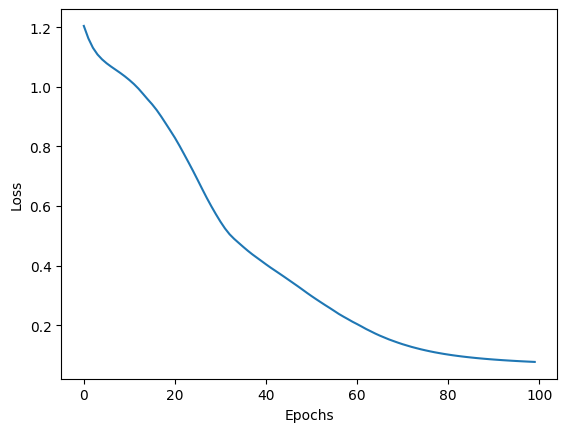

In [80]:
# graph
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [81]:
# Evaluate model on test data
with torch.no_grad():
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test)
print(loss)

tensor(0.0349)


In [82]:
#verify the issue with loss
correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(data.numpy()):25} -> {y_val.argmax().item():2} : {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. [5.8 2.8 5.1 2.4]         ->  2 : 2
 2. [6.  2.2 4.  1. ]         ->  1 : 1
 3. [5.5 4.2 1.4 0.2]         ->  0 : 0
 4. [7.3 2.9 6.3 1.8]         ->  2 : 2
 5. [5.  3.4 1.5 0.2]         ->  0 : 0
 6. [6.3 3.3 6.  2.5]         ->  2 : 2
 7. [5.  3.5 1.3 0.3]         ->  0 : 0
 8. [6.7 3.1 4.7 1.5]         ->  1 : 1
 9. [6.8 2.8 4.8 1.4]         ->  1 : 1
10. [6.1 2.8 4.  1.3]         ->  1 : 1
11. [6.1 2.6 5.6 1.4]         ->  2 : 2
12. [6.4 3.2 4.5 1.5]         ->  1 : 1
13. [6.1 2.8 4.7 1.2]         ->  1 : 1
14. [6.5 2.8 4.6 1.5]         ->  1 : 1
15. [6.1 2.9 4.7 1.4]         ->  1 : 1
16. [4.9 3.1 1.5 0.1]         ->  0 : 0
17. [6.  2.9 4.5 1.5]         ->  1 : 1
18. [5.5 2.6 4.4 1.2]         ->  1 : 1
19. [4.8 3.  1.4 0.3]         ->  0 : 0
20. [5.4 3.9 1.3 0.4]         ->  0 : 0
21. [5.6 2.8 4.9 2. ]         ->  2 : 2
22. [5.6 3.  4.5 1.5]         ->  1 : 1
23. [4.8 3.4 1.9 0.2]         ->  0 : 0
24. [4.4 2.9 1.4 0.2]         ->  0 : 0
25. [6.2 2.8 4.8 1.8]         ->  2 : 2


In [87]:
# test with new data
with torch.no_grad():
    new_data = torch.tensor([5.1, 3.5, 1.4, 0.2])
    y_val = model.forward(new_data)
   # print(f'{new_data} -> {y_val.argmax().item()}')
    if y_val.argmax().item() == 0:
        print('Iris Setosa')
    elif y_val.argmax().item() == 1:
        print('Iris Versicolor')
    else:
        print('Iris Virginica')

Iris Setosa


In [88]:
#save model
torch.save(model.state_dict(), 'iris_model.pt')


In [91]:
#load the model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))
new_model.eval()

with torch.no_grad():
    new_data = torch.tensor([5.1, 3.5, 1.4, 4.8])
    y_val = new_model.forward(new_data)
    print(f'{new_data} -> {y_val.argmax().item()}')

#

tensor([5.1000, 3.5000, 1.4000, 4.8000]) -> 2


<ipython-input-91-120fda4d8130>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))
